# Risolvere equazioni differenziali ordinarie

Consideriamo un oscillatore armonico con attrito
\begin{align}
\ddot x + \mu \dot x + \omega^2 x = 0
\end{align}
dove $\omega$ è la frequenza e $\mu$ il coefficiente di attrito. Per risolverlo numericamente, dobbiamo scriverlo come sistema di equazioni del primo ordine. Ovviamente otteniamo
\begin{align}
\begin{cases}
\dot x = y \\
\dot y = - \omega^2 x - \mu y
\end{cases}
\end{align}
Useremo le librerie *numpy*, *scipy*,  *matplotlib* e *seaborn*. Cominciamo ad importarle:

In [1]:
import numpy as np                                  # libreria matematica
import scipy as sp
import matplotlib.pyplot as plt                     # librerie grafiche

from scipy.integrate import odeint                  # altra libreria matematica    odeint e' per integrare le equazioni


## Parametri definiti globalmente
Se vogliamo risolvere con parametri fissati, la procedura più facile è definire i due parametri come variabili globali.

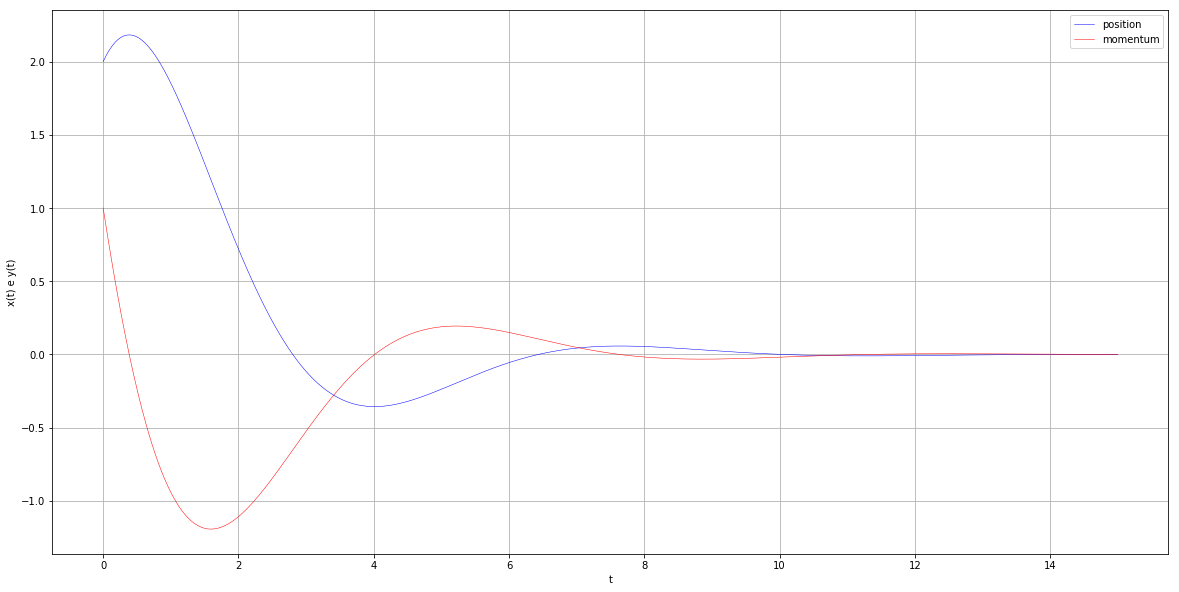

In [2]:
# fissiamo i parametri
omega = 1.0
mu = 1.0

# definiamo la funzione campo vettoriale
def vf(z, t):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y = z[0], z[1]
    
    dx = y
    dy = -omega * x - mu*y

    return [dx, dy]


# initial state: 
z0 = [2.0, 1.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 15, 1000)


# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, t)    


# plottiamo

plt.figure(figsize=(20,10))   # dimensione della figura

plt.plot(t, zt[:,0] ,'b-',linewidth=0.5, label='position')    
plt.plot(t, zt[:,1],'r-',linewidth=0.5, label='momentum')   
plt.xlabel('t')
plt.ylabel('x(t) e y(t)')
plt.grid(True)
plt.legend()



plt.show()

Possiamo anche *plottare* il ritratto di fase

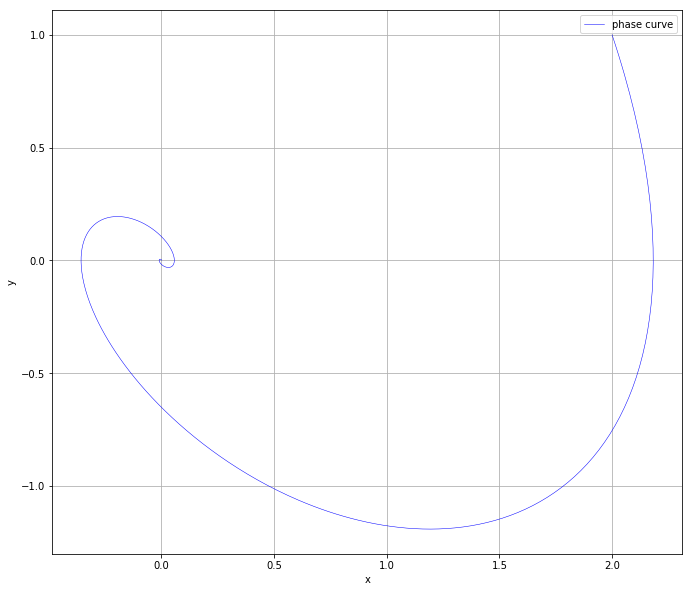

In [3]:
plt.figure(figsize=(20,10))   # dimensione della figura

plt.plot(zt[:,0], zt[:,1], 'b-', linewidth=0.5, label='phase curve')    # è il primo ramo della varietà stabile
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('scaled')
plt.legend()

plt.show()

## Variare i parametri

Adesso vogliamo passare alla funzione `odeint` i parametri con cui risolvere l'equazione.

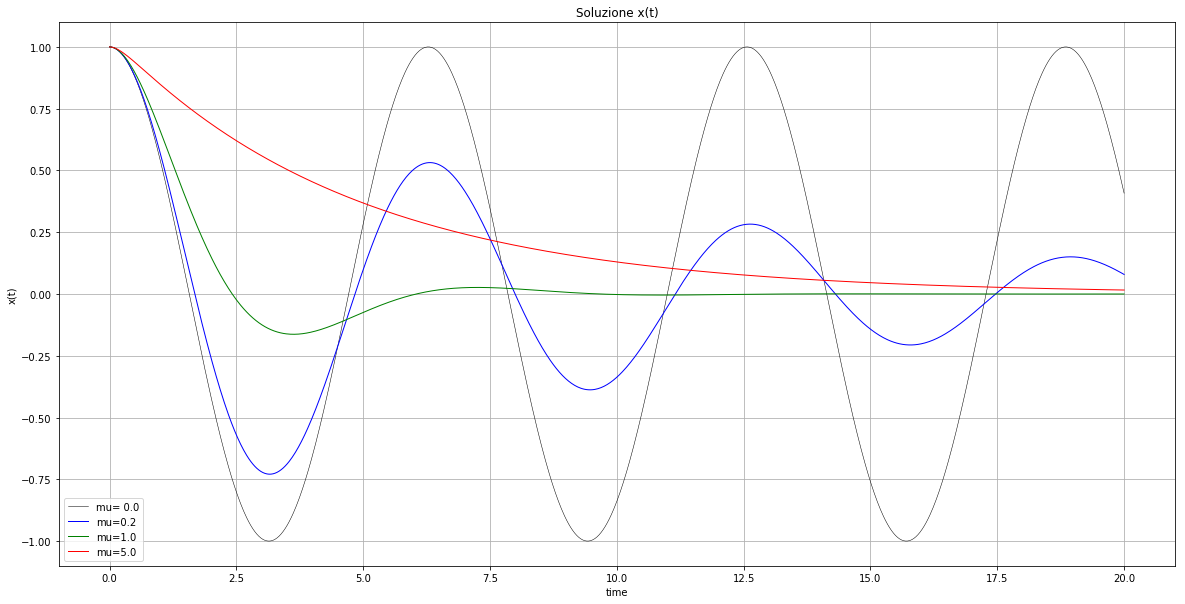

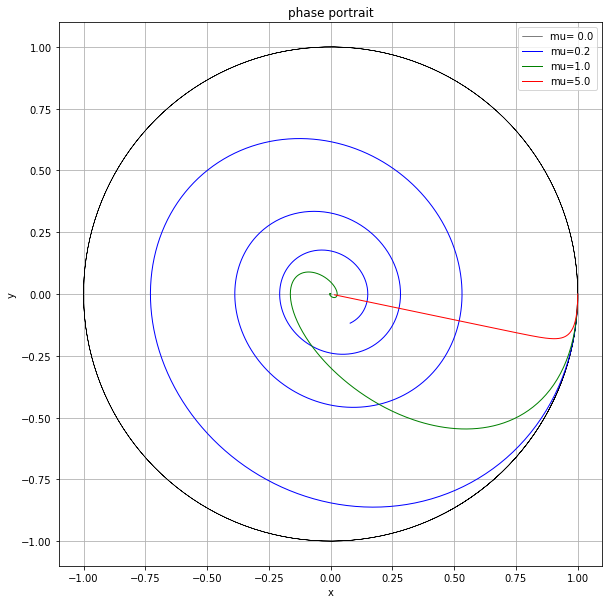

In [41]:
# definiamo la funzione campo vettoriale con i parametri
def vf_parameters(z, t, mu, omega):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y = z[0], z[1]
    
    dx = y
    dy = -omega * x - mu*y

    return [dx, dy]


# initial state: 
z0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 20, 1000)



# parametri
mu1, mu2, mu3, mu4 = [0.0, 0.2, 1.0, 5.0]
omega1, omega2, omega3, omega4 = [1.0, 2.0, 5.0, 10.0]

# solve the ODE problem for 4 different values of the damping ratio

z1 = odeint(vf_parameters, z0, t, args=(mu1, omega1)) 
z2 = odeint(vf_parameters, z0, t, args=(mu2, omega1)) 
z3 = odeint(vf_parameters, z0, t, args=(mu3, omega1)) 
z4 = odeint(vf_parameters, z0, t, args=(mu4, omega1)) 


# plot results
plt.figure(figsize=(20,10))   # dimensione della figura

plt.plot(t,z1[:,0],'k-',linewidth=0.5,label='mu= {}'.format(mu1) )
plt.plot(t,z2[:,0],'b-',linewidth=1,label='mu={}'.format(mu2))
plt.plot(t,z3[:,0],'g-',linewidth=1,label='mu={}'.format(mu3))
plt.plot(t,z4[:,0],'r-',linewidth=1,label='mu={}'.format(mu4))

plt.title('Soluzione x(t)')
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))   # dimensione della figura

plt.plot(z1[:,0],z1[:,1], 'k-',linewidth=0.5,label='mu= {}'.format(mu1) )
plt.plot(z2[:,0],z2[:,1], 'b-',linewidth=1,label='mu={}'.format(mu2))
plt.plot(z3[:,0],z3[:,1], 'g-',linewidth=1,label='mu={}'.format(mu3))
plt.plot(z4[:,0],z4[:,1], 'r-',linewidth=1,label='mu={}'.format(mu4))

plt.title('phase portrait')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('scaled')         # riscala gli assi

plt.legend()
plt.show()


## Using *Interact*

The interact function `(ipywidgets.interact)` automatically creates user interface (UI) controls for exploring code and data interactively.

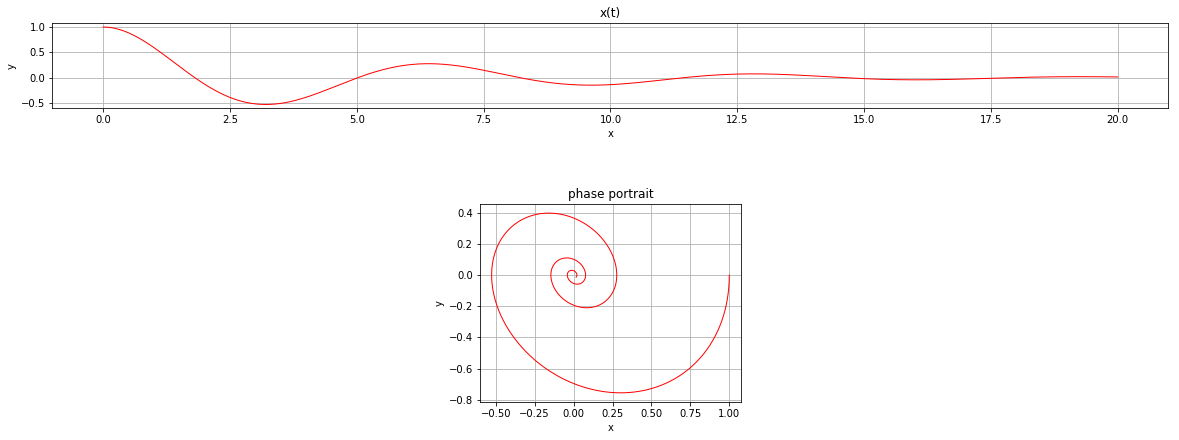

In [4]:
def solve_eq(mu=0.1, omega = 1.0):
    
    # inseriamo il campo vettoriale
    def vf_parameters(x_y, t, mu=mu, omega=omega):
        x1, x2 = x_y

        return [x2, -omega*x1 - mu*x2]


     # initial state: 
    z0 = [1.0, 0.0]

    # time coodinate to solve the ODE for
    t = np.linspace(0, 20, 1000)
  

    z1 = odeint(vf_parameters, z0, t)

    plt.figure(figsize=(20,8))
    plt.subplot(2, 1, 1)
    plt.plot(t,z1[:,0], 'r-',linewidth=1)
    plt.title('x(t)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axis('scaled')         # riscala gli assi
    
    
    plt.subplot(2, 1, 2)
    plt.plot(z1[:,0],z1[:,1], 'r-',linewidth=1)
    plt.title('phase portrait')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axis('scaled')
    plt.show()
    return 
            

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

w=interactive(solve_eq, mu=(0.0,5.0, 0.1),omega=(0.1,5.0, 0.1))
w

## Il comando `on_click`

<IPython.core.display.Javascript object>


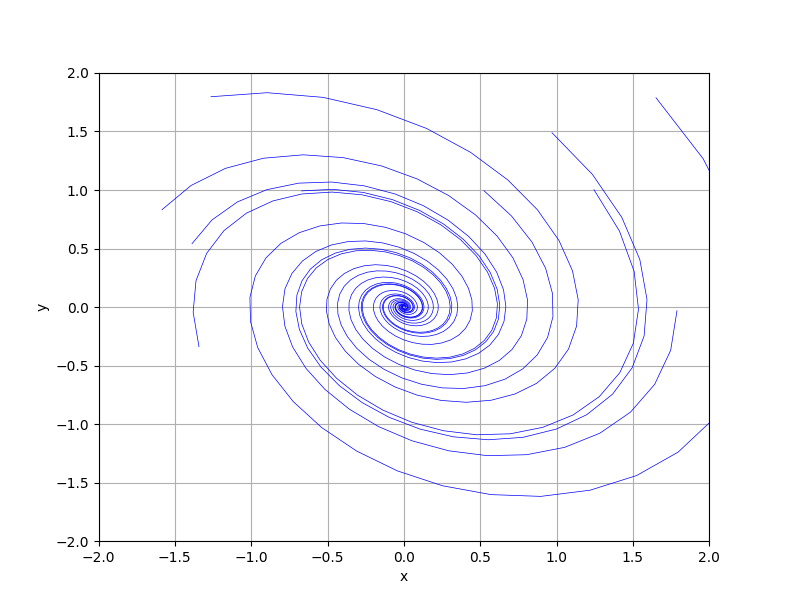

7

In [5]:
%matplotlib notebook

# adesso fisso i parametri
omega = 1.0
mu = 0.5

# definiamo la funzione campo vettoriale
def vf(z, t):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y = z[0], z[1]
    
    dx = y
    dy = -omega * x - mu*y

    return [dx, dy]



# time coodinate to solve the ODE for
t = np.linspace(0, 20, 100)


# credo il grafico
fig = plt.figure()

ax = fig.add_subplot(111, xlim=(-2, 2), ylim=(-2, 2))


# Function to be called when mouse is clicked
def on_click(event):
    z0=[event.xdata, event.ydata]   #le coordinate sono in event.xdata e event.ydata
    zt = odeint(vf, z0, t)          #risolvo l'equazione con questo dato iniziale    
    # plottiamo
    plt.plot(zt[:,0], zt[ :,1],'b-',linewidth=0.5)    
    plt.xlabel('x')
    plt.ylabel('y')
   
    plt.grid(True)
    return event


# Connect the click function to the button press event
fig.canvas.mpl_connect('button_press_event', on_click)


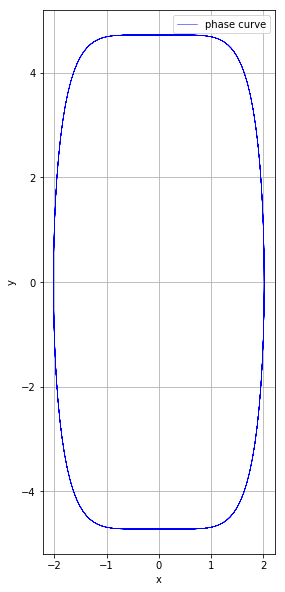

In [6]:
# fissiamo i parametri


def cutoff(x, k):
    return  

# definiamo la funzione campo vettoriale
def vf(z, t):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y = z[0], z[1]
    
    dx = y
    dy = - x**5 

    return [dx, dy]


# initial state: 
z0 = [2.0, 1.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 15, 1000)


# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, t)    


# plottiamo
plt.figure(figsize=(20,10))   # dimensione della figura

plt.plot(zt[:,0], zt[:,1], 'b-', linewidth=0.5, label='phase curve')    # è il primo ramo della varietà stabile
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('scaled')
plt.legend()



plt.show()